# Checking of ISIMIP2b histsoc and rcp26soc (following SSP2) population, GDP and simulated domestic and industrial water withdrawals

This notebook gives an outline with maps of sharp transition years as well as grid cell timeseries of the mentioned variables. 

The following issues were discovered: 

#### **ISSUE 1**

Transition in population dataset between 2005-2006, not taking into account spatial patterns. Issue is explained in more detail in this [slidedeck](./documentation/population_issues_ISIMIP2b_inputdata.pdf). 

The data is corrected for postprocessing using the [correctionscript](./population_data_correction_for_consistent_spatial_distribution_of_national_population.ipynb) developed by Sabin Taranu. However, the use of the original dataset as input into the global hydrological models lead to issues and sharp transitions in simulated domestic and industrial water demands. 


#### **ISSUE 2**

Sharp transitions in simulated domestic and industrial water use around 2000. These could be coming from the population dataset (eg Saudi-Arabia grid cell) but the same transition patterns are not apparent in the population maps. 


#### **Solution**

Rerun hydrological models with ISIMIP2b corrected inputdata: 
- H08: to ask -> mail Naota (Inne will do)
- CWatM: possible, mail Dr. Mikhail Smilovic with Yoshi in CC. 
- MATSIRO: can rerun (confirmed by Yusuke) but needs domestic and industrial water demands as input. (--> would it be really necessary to rerun, only for consistent water availability corrected for upstream use?)
- LPJmL: similar to MATSIRO, contact Sebastian Ostberg if necessary. 
- WaterGAP: (Martine Flörke's group is setting up ISIMIP2b simulations with changing domestic and industrial demand in future) -> get in touch with Hannes to see state

#### **TO DO** (Sabin?)

* Dive into more depth in the corrected population dataset: is the 2000 issue not present? 
* Do the correction and checking for 2000 and beyond for GDP as well
* What is happening with CWatM?? 

In [196]:
# import modules
import os
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
%matplotlib inline 


In [206]:
# define coordinates of individual gridcells to plot timeseries of

cell_saudi = [21.25, 49.75] # grid cell lat lon coordinates: Grid cell in Saudi-Arabia
cell_france = [50.75,4.75]
cell_kazachstan = [47.75, 81.25]

cells_toplot = [cell_saudi, cell_france,  cell_kazachstan ]
names_toplot = ['Saudi',      'France',    'Kazachstan']

## 0. Functions

In [207]:
# functions to plot individual grid cells

# wrapper plotting script for plotting individual grid cells 
def plot_cell_series(da, cells_toplot, names_toplot):
    fig, axes = plt.subplots(1,len(cells_toplot), figsize=(7*len(cells_toplot),4))

    for i, ax in enumerate(axes): 
        plot_gridcell_timeseries(ax, da, cells_toplot[i], names_toplot[i])

# plot timeseries of data array for single grid cell 
def plot_gridcell_timeseries(ax, da, cell_coord, name): 
    da.sel({'lat':cell_coord[0],'lon':cell_coord[1]}).plot(ax=ax)
    ax.set_title(name+ ' grid cell')
    #ax.axvline(2000, color='grey')    
    
def plot_globalsum_timeseries(da): 
    fig,ax = plt.subplots()
    da.sum(dim=('lat','lon')).plot()
    ax.set_title('global sum')

In [208]:
# plot transition maps from 1999-2000 and 2000-2001
def plot_2000_transition_maps(delta_2000_1999,delta_2001_2000,delta_2005_2006,variable_name): 


    map_proj = ccrs.Robinson(central_longitude=0, globe=None)

    fig, axes = plt.subplots(1,3,figsize=(40,20), subplot_kw={'projection':map_proj})

    axes = axes.flatten()

    ax= axes[0]
    ax.axis('off')
    ax.coastlines(color='lightgray',linewidth=0.5)

    delta_2000_1999.plot(ax=ax, cbar_kwargs={'fraction': 0.02, 'pad': 0.04}, cmap='RdBu', vmin=-30, vmax=30, transform=ccrs.PlateCarree())

    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title('');

    ax.set_title('$\Delta$ ' +variable_name+' 2000-1999 (%)', loc='right', fontsize=20);
    ax.set_title('                 a.', loc='left', fontsize=20);


    ax = axes[1]


    ax.axis('off')
    ax.coastlines(color='lightgray',linewidth=0.5)

    delta_2001_2000.plot(ax=ax, cbar_kwargs={'fraction': 0.02, 'pad': 0.04}, cmap='RdBu', vmin=-30, vmax=30, transform=ccrs.PlateCarree())

    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title('');

    ax.set_title('$\Delta$ ' +variable_name+' 2001-2000 (%)', loc='right', fontsize=20);
    ax.set_title('                 a.', loc='left', fontsize=20);
    
    
    ax = axes[2]


    ax.axis('off')
    ax.coastlines(color='lightgray',linewidth=0.5)

    delta_2005_2006.plot(ax=ax, cbar_kwargs={'fraction': 0.02, 'pad': 0.04}, cmap='RdBu', vmin=-30, vmax=30, transform=ccrs.PlateCarree())

    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_title('');

    ax.set_title('$\Delta$ ' +variable_name+' 2005-2006 (%)', loc='right', fontsize=20);
    ax.set_title('                 a.', loc='left', fontsize=20);

## 1. Population (Uncorrected)
Original population as provided in ISIMIP2b. This is used directly in the hydrological model simulations. 

In [209]:
pop = xr.open_dataset('/scratch/brussel/vo/000/bvo00012/vsc10055/waterscarcity/waterscarcity_isimip/data/intermediate/population_histsoc_rcp26soc_0p5deg_annual_1861-2100.nc4')['pop']

#pop = xr.open_dataset('/scratch/brussel/vo/000/bvo00012/vsc10055/waterscarcity/waterscarcity_isimip/data/intermediate/corrected_with_regionmask_population_histsoc_rcp26soc_0p5deg_annual_1861-2100.nc4')['pop']

### Spatial year-to-year transitions

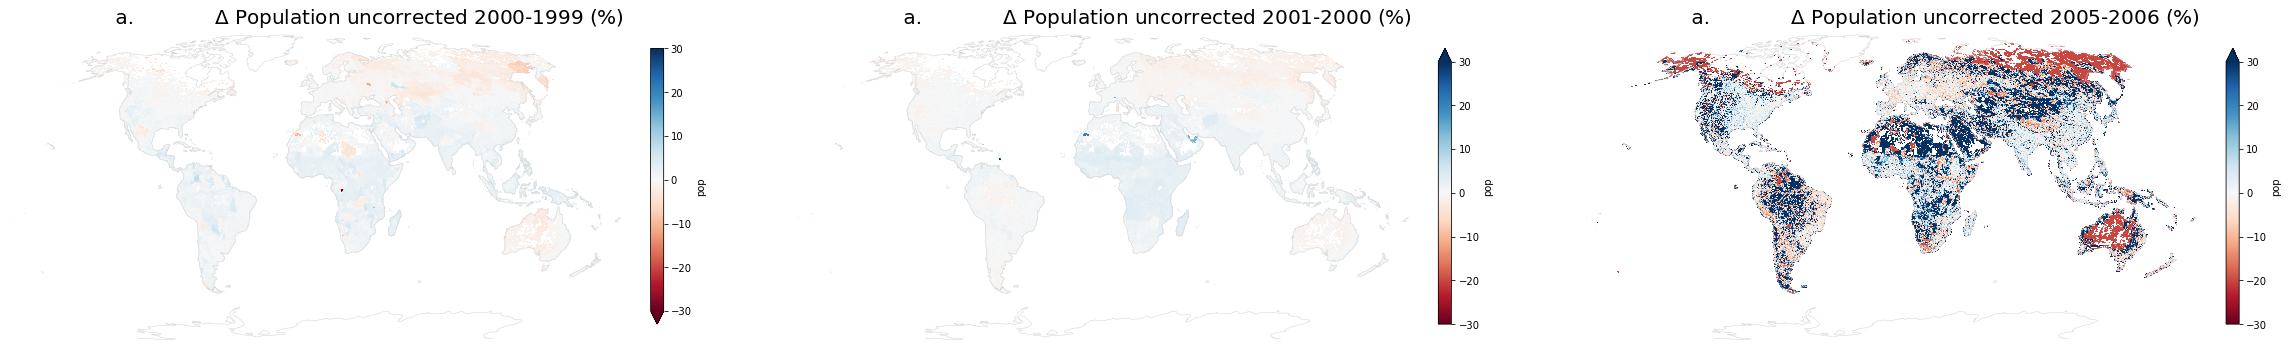

In [210]:
pop_2000 = pop.sel(time="2000-12-31").squeeze()
pop_1999 = pop.sel(time="1999-12-31").squeeze()
pop_2001 = pop.sel(time="2001-12-31").squeeze()
pop_2005 = pop.sel(time="2005-12-31").squeeze()
pop_2006 = pop.sel(time="2006-12-31").squeeze()

delta_2000_1999 = (pop_2000 - pop_1999)/pop_1999 *100
delta_2001_2000 = (pop_2001 - pop_2000)/pop_2000 *100
delta_2006_2005 = (pop_2006 - pop_2005)/pop_2005 *100

variable_name = 'Population uncorrected'

plot_2000_transition_maps(delta_2000_1999,delta_2001_2000,delta_2006_2005, variable_name)

### Plot timeseries for individual grid cells and global mean

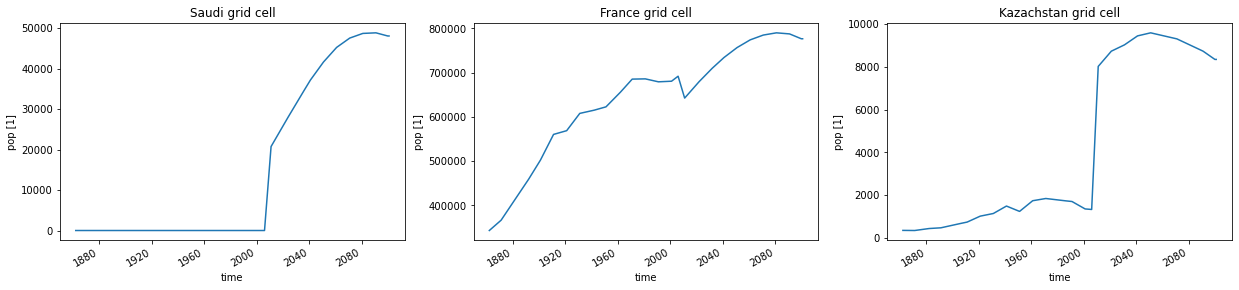

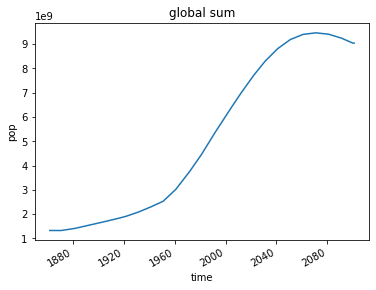

In [211]:
# define variable to plot 
da = pop

# do plotting
plot_cell_series(da, cells_toplot, names_toplot)
plot_globalsum_timeseries(da)

## 2. Population corrected for 2005-2006 transition (See [correctionscript](./population_data_correction_for_consistent_spatial_distribution_of_national_population.ipynb))
This corrected dataset is used in the postprocessing scripts of the lifetime water scarcity project

In [212]:
pop = xr.open_dataset('/scratch/brussel/vo/000/bvo00012/vsc10055/waterscarcity/waterscarcity_isimip/data/intermediate/corrected_with_regionmask_population_histsoc_rcp26soc_0p5deg_annual_1861-2100.nc4')['pop']

### Spatial year-to-year transitions

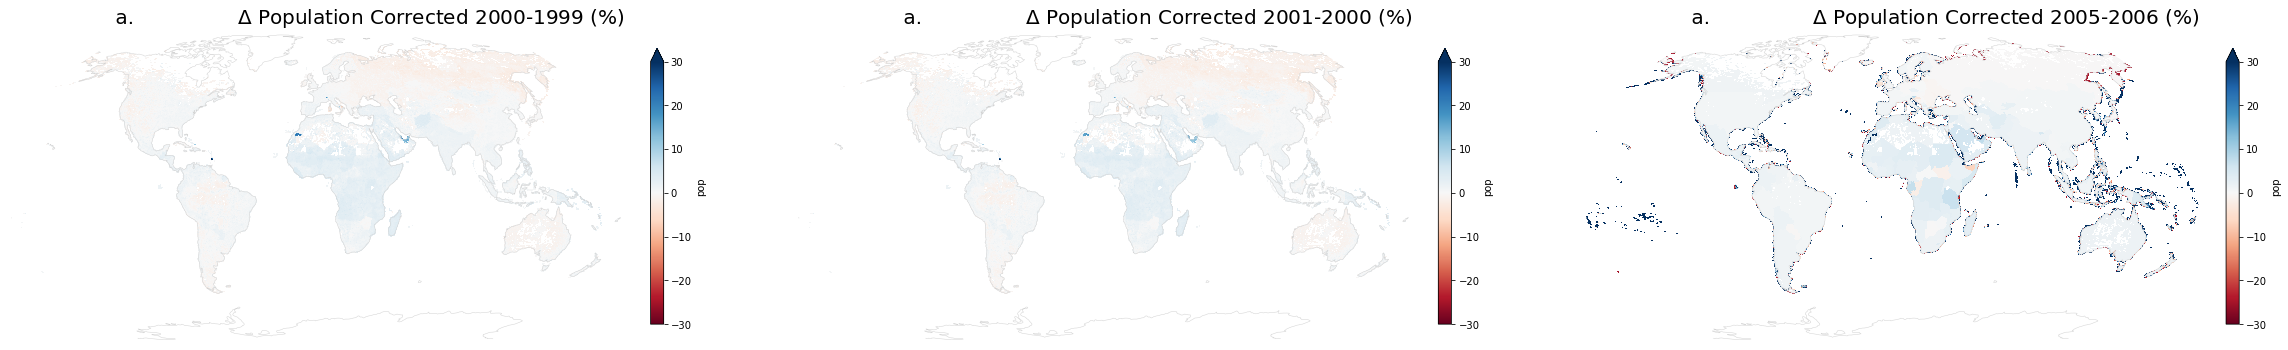

In [213]:
pop_2000 = pop.sel(time="2000-12-31").squeeze()
pop_1999 = pop.sel(time="1999-12-31").squeeze()
pop_2001 = pop.sel(time="2001-12-31").squeeze()
pop_2005 = pop.sel(time="2005-12-31").squeeze()
pop_2006 = pop.sel(time="2006-12-31").squeeze()

delta_2000_1999 = (pop_2000 - pop_1999)/pop_1999 *100
delta_2001_2000 = (pop_2001 - pop_2000)/pop_2000 *100
delta_2006_2005 = (pop_2006 - pop_2005)/pop_2005 *100

variable_name = 'Population Corrected'

plot_2000_transition_maps(delta_2000_1999,delta_2001_2000,delta_2006_2005, variable_name)

### Plot timeseries for individual grid cells and global mean

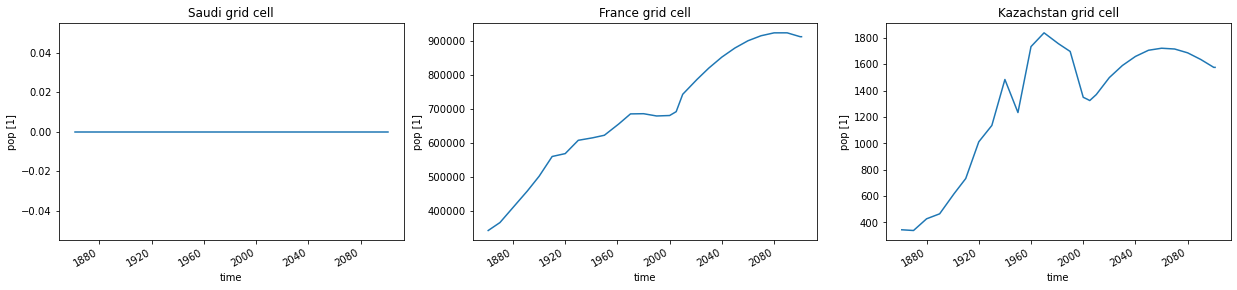

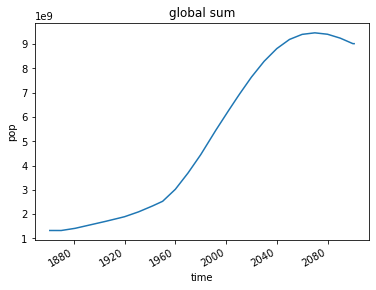

In [215]:
# define variable to plot 
da = pop

# do plotting
plot_cell_series(da, cells_toplot, names_toplot)

plot_globalsum_timeseries(da)

## 3. GDP

GDP is used as input for the hydrological models (and not in postprocessing)

In [216]:
gdp_hist =  xr.open_dataset('/data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP2b/InputData/gdp/histsoc/gdp_histsoc_0p5deg_annual_1861-2005.nc4')
gdp_fut = xr.open_dataset('/data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP2b/InputData/gdp/rcp26soc/gdp_rcp26soc_0p5deg_annual_2006-2099.nc4')
gdp = xr.concat([gdp_hist,gdp_fut],dim='time')['gdp']


### Spatial year-to-year transitions

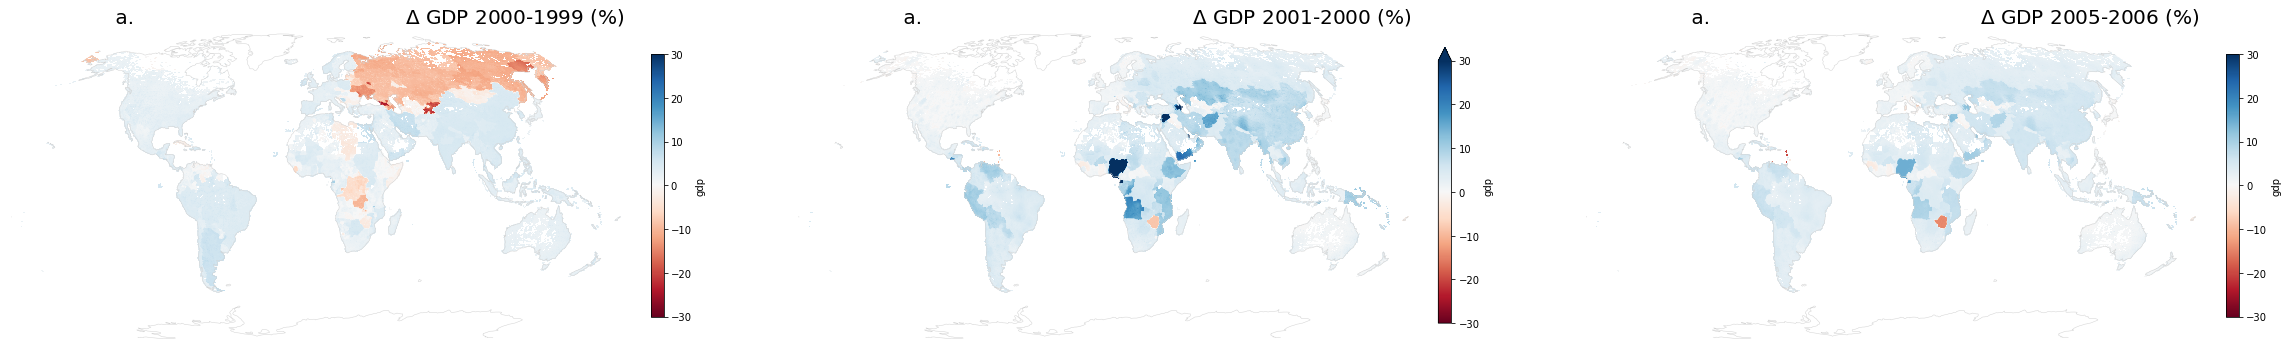

In [217]:
variable_name = 'GDP'
gdp_2000 = gdp.sel(time="2000-01-01").squeeze()
gdp_1999 = gdp.sel(time="1999-01-01").squeeze()
gdp_2001 = gdp.sel(time="2001-01-01").squeeze()
gdp_2005 = gdp.sel(time="2005-01-01").squeeze()
gdp_2006 = gdp.sel(time="2006-01-01").squeeze()

delta_2000_1999 = (gdp_2000 - gdp_1999)/gdp_1999 *100
delta_2001_2000 = (gdp_2001 - gdp_2000)/gdp_2000 *100
delta_2006_2005 = (gdp_2006 - gdp_2005)/gdp_2005 *100

plot_2000_transition_maps(delta_2000_1999,delta_2001_2000,delta_2006_2005,variable_name)


### Plot timeseries for individual grid cells and global mean

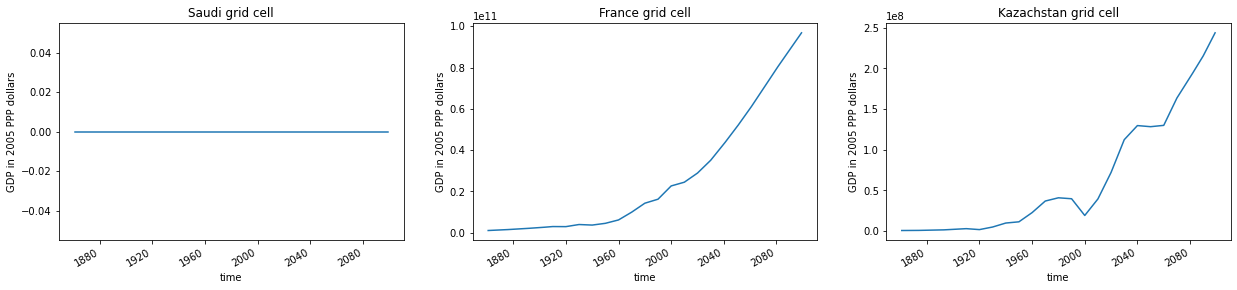

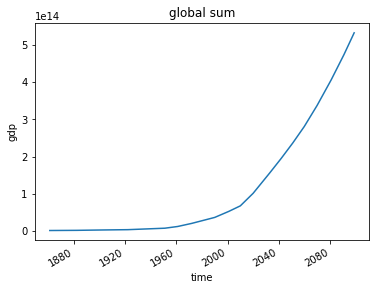

In [218]:
# define variable to plot 
da = gdp

# do plotting
plot_cell_series(da, cells_toplot, names_toplot)

plot_globalsum_timeseries(da)

## 4. Domestic and industrial water demand (ISIMIP2a input data)
(ISIMIP 2b inputdata: multi-model mean of WaterGAP, H08 and PCR-GLOWB): used for LPJmL and MATSIRO as input

In [219]:
# Load postprocessed water scarcity files (only postprocessing is merging and giving right time dimension)

waterscarcity_dir = '/scratch/brussel/vo/000/bvo00012/vsc10055/waterscarcity/waterscarcity_isimip/'

domww = xr.open_dataset(waterscarcity_dir+'/data/2b/intermediate/lpjml/domww.nc')['domww']
indww = xr.open_dataset(waterscarcity_dir+'/data/2b/intermediate/lpjml/indww.nc')['indww']

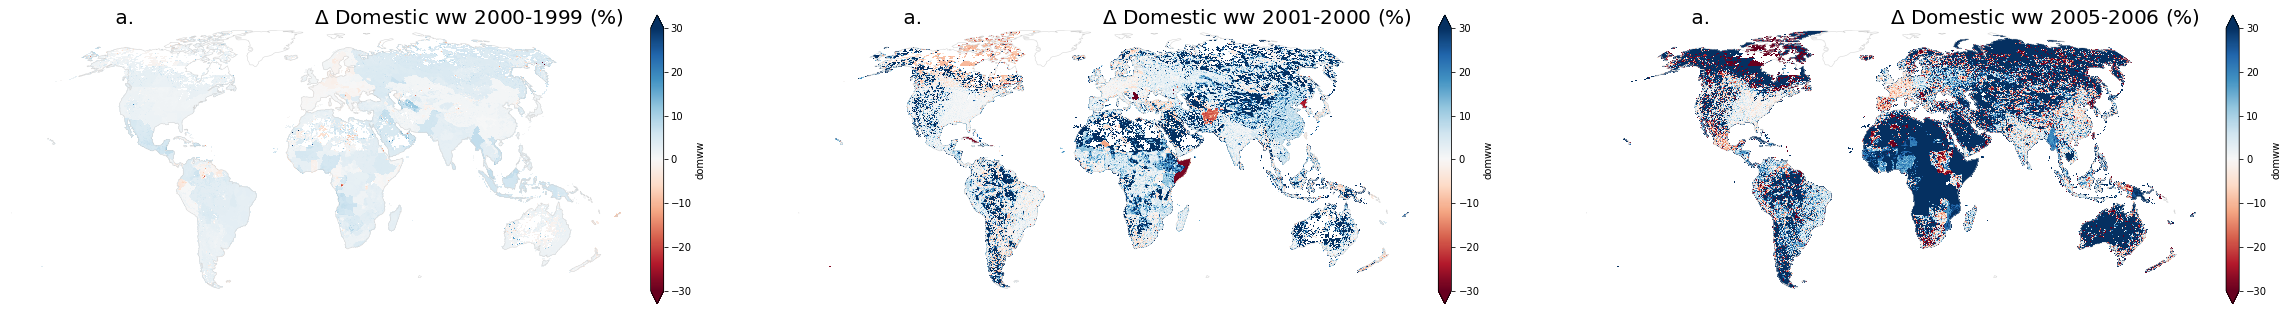

In [220]:
variable_name = 'Domestic ww'
ww = domww

ww_2000 = ww.sel(time="2000-07-15").squeeze()
ww_1999 = ww.sel(time="1999-07-15").squeeze()
ww_2001 = ww.sel(time="2001-07-15").squeeze()
ww_2005 = ww.sel(time="2005-07-15").squeeze()
ww_2006 = ww.sel(time="2006-07-15").squeeze()

delta_2000_1999 = (ww_2000 - ww_1999)/ww_1999 *100
delta_2001_2000 = (ww_2001 - ww_2000)/ww_2000 *100
delta_2006_2005 = (ww_2006 - ww_2005)/ww_2005 *100

plot_2000_transition_maps(delta_2000_1999,delta_2001_2000,delta_2006_2005, variable_name)


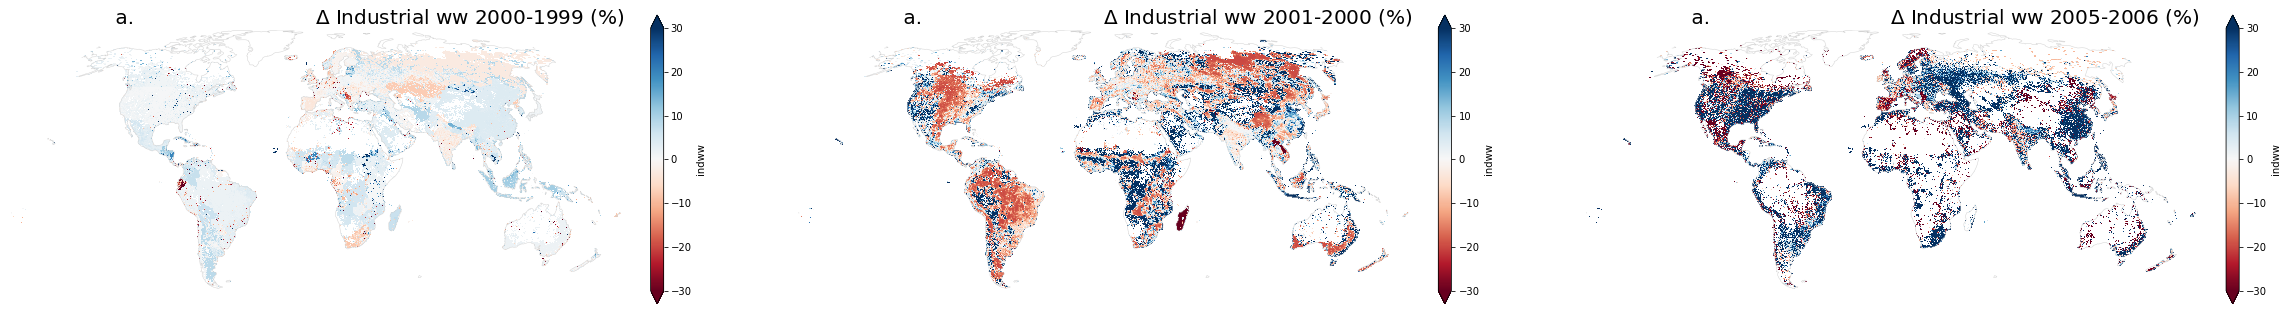

In [221]:
variable_name = 'Industrial ww'
ww = indww

ww_2000 = ww.sel(time="2000-07-15").squeeze()
ww_1999 = ww.sel(time="1999-07-15").squeeze()
ww_2001 = ww.sel(time="2001-07-15").squeeze()
ww_2005 = ww.sel(time="2005-07-15").squeeze()
ww_2006 = ww.sel(time="2006-07-15").squeeze()

delta_2000_1999 = (ww_2000 - ww_1999)/ww_1999 *100
delta_2001_2000 = (ww_2001 - ww_2000)/ww_2000 *100
delta_2006_2005 = (ww_2006 - ww_2005)/ww_2005 *100

plot_2000_transition_maps(delta_2000_1999,delta_2001_2000,delta_2006_2005, variable_name)


### Plot timeseries for individual grid cells and global mean

DOMESTIC


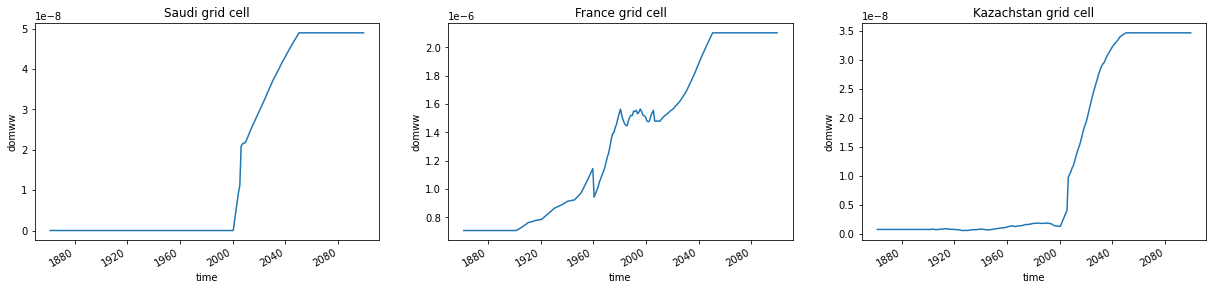

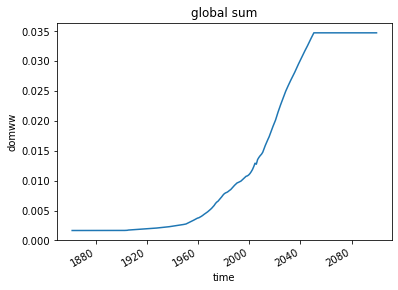

In [222]:
# define variable to plot 
da = domww

print('DOMESTIC')

# do plotting
plot_cell_series(da, cells_toplot, names_toplot)

plot_globalsum_timeseries(da)

INDUSTRIAL


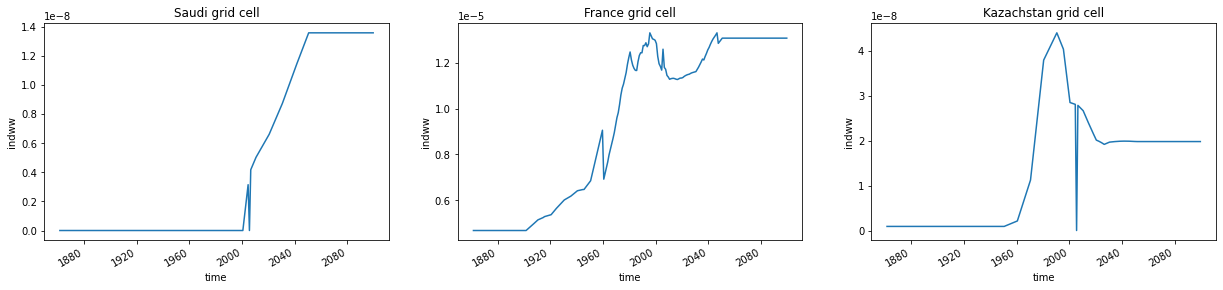

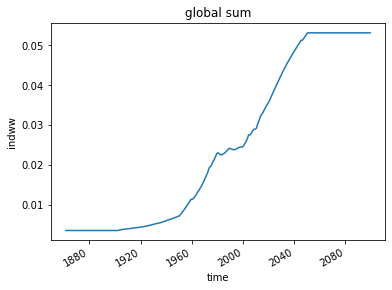

In [223]:
# define variable to plot 
da = indww

print('INDUSTRIAL')

# do plotting
plot_cell_series(da, cells_toplot, names_toplot)

plot_globalsum_timeseries(da)

## 5. Domestic and industrial water demand for H08 (here for HadGEM)
as modeled output (raw, not postprocessed)

In [224]:
# load historical and future water demands from raw simulations

domww_hist = xr.open_dataset('/data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP2b/OutputData/water_global/H08/hadgem2-es/historical/h08_hadgem2-es_ewembi_historical_histsoc_co2_adomww_global_annual_1861_2005.nc4', decode_times=False)['adomww']
indww_hist = xr.open_dataset('/data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP2b/OutputData/water_global/H08/hadgem2-es/historical/h08_hadgem2-es_ewembi_historical_histsoc_co2_amanww_global_annual_1861_2005.nc4', decode_times=False)['amanww']

domww_fut = xr.open_dataset('/data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP2b/OutputData/water_global/H08/hadgem2-es/future/h08_hadgem2-es_ewembi_rcp60_rcp60soc_co2_adomww_global_annual_2006_2099.nc4', decode_times=False)['adomww']
indww_fut = xr.open_dataset('/data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP2b/OutputData/water_global/H08/hadgem2-es/future/h08_hadgem2-es_ewembi_rcp60_rcp60soc_co2_amanww_global_annual_2006_2099.nc4', decode_times=False)['amanww']

In [228]:
# assign right timing for comparison purposes

domww_hist = domww_hist.assign_coords(time = pd.date_range(start='1861', end='2006', freq='Y'))
domww_fut = domww_fut.assign_coords(time = pd.date_range(start='2006', end='2100', freq='Y'))

indww_hist = indww_hist.assign_coords(time = pd.date_range(start='1861', end='2006', freq='Y'))
indww_fut = indww_fut.assign_coords(time = pd.date_range(start='2006', end='2100', freq='Y'))

domww = xr.concat([domww_hist,domww_fut],dim='time')
indww = xr.concat([indww_hist,indww_fut],dim='time')

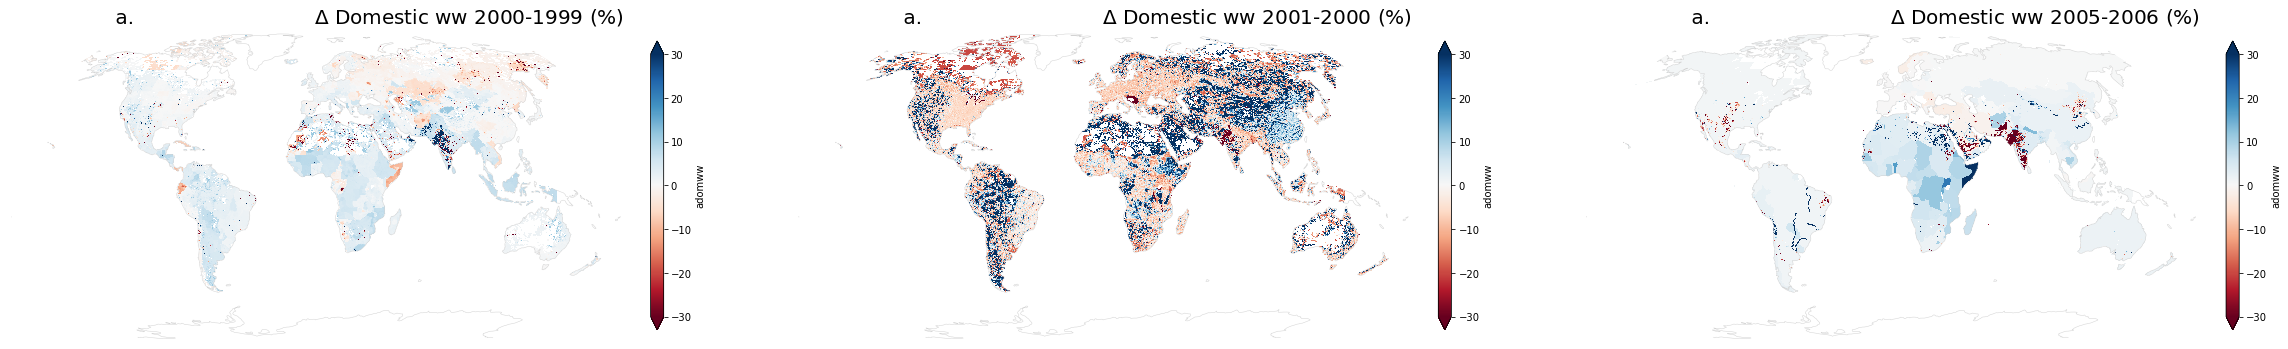

In [231]:
variable_name = 'Domestic ww'
ww = domww

ww_2000 = ww.sel(time="2000-12-31").squeeze()
ww_1999 = ww.sel(time="1999-12-31").squeeze()
ww_2001 = ww.sel(time="2001-12-31").squeeze()
ww_2005 = ww.sel(time="2005-12-31").squeeze()
ww_2006 = ww.sel(time="2006-12-31").squeeze()

delta_2000_1999 = (ww_2000 - ww_1999)/ww_1999 *100
delta_2001_2000 = (ww_2001 - ww_2000)/ww_2000 *100
delta_2006_2005 = (ww_2006 - ww_2005)/ww_2005 *100

plot_2000_transition_maps(delta_2000_1999,delta_2001_2000,delta_2006_2005, variable_name)


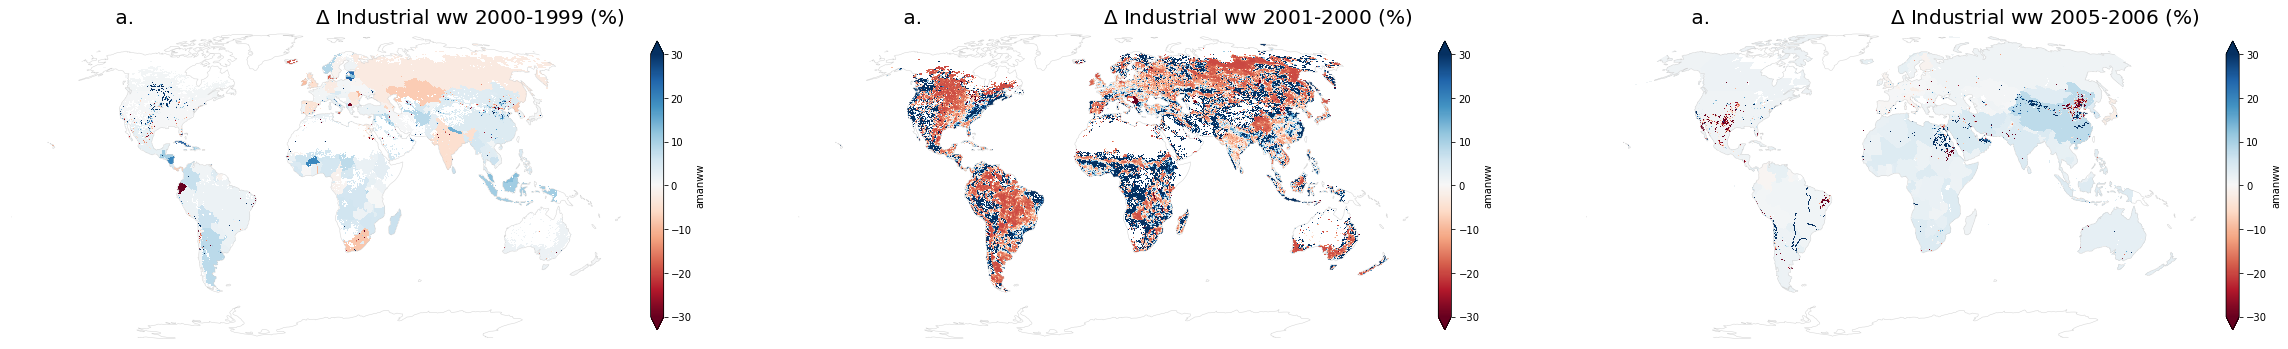

In [232]:
variable_name = 'Industrial ww'
ww = indww


ww_2000 = ww.sel(time="2000-12-31").squeeze()
ww_1999 = ww.sel(time="1999-12-31").squeeze()
ww_2001 = ww.sel(time="2001-12-31").squeeze()
ww_2005 = ww.sel(time="2005-12-31").squeeze()
ww_2006 = ww.sel(time="2006-12-31").squeeze()

delta_2000_1999 = (ww_2000 - ww_1999)/ww_1999 *100
delta_2001_2000 = (ww_2001 - ww_2000)/ww_2000 *100
delta_2006_2005 = (ww_2006 - ww_2005)/ww_2005 *100

plot_2000_transition_maps(delta_2000_1999,delta_2001_2000,delta_2006_2005, variable_name)


### Plot timeseries for individual grid cells and global mean

DOMESTIC


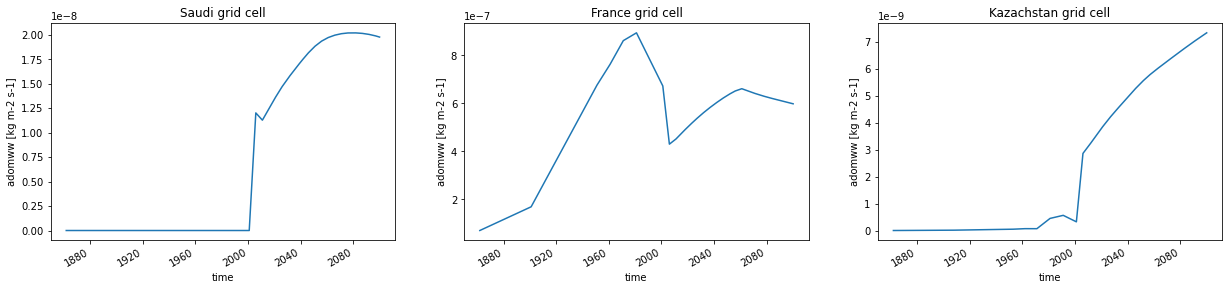

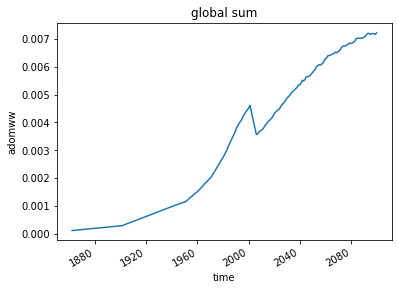

In [233]:
# define variable to plot 
da = domww

print('DOMESTIC')

# do plotting
plot_cell_series(da, cells_toplot, names_toplot)

plot_globalsum_timeseries(da)

INDUSTRIAL


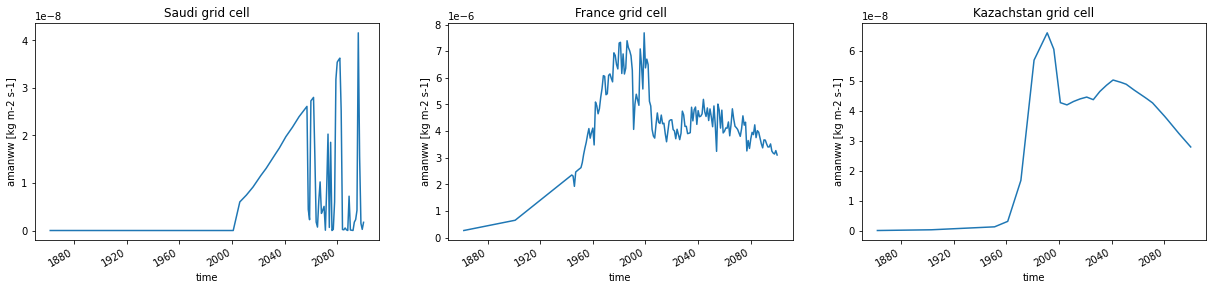

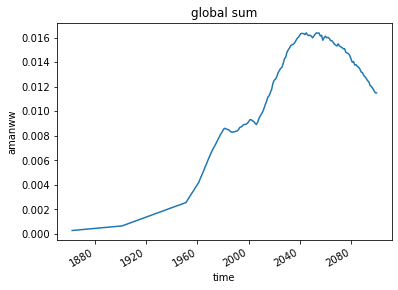

In [234]:
# define variable to plot 
da = indww

print('INDUSTRIAL')

# do plotting
plot_cell_series(da, cells_toplot, names_toplot)

plot_globalsum_timeseries(da)

## 6. Domestic and industrial water demand for CWatM (here for HadGEM)
as modeled output (raw, not postprocessed)

In [236]:
domww_hist = xr.open_dataset('/data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP2b/OutputData/water_global/CWatM/hadgem2-es/historical/cwatm_hadgem2-es_ewembi_historical_histsoc_co2_adomuse_global_annual_1861_2005.nc4', decode_times=False)['adomuse']
indww_hist = xr.open_dataset('/data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP2b/OutputData/water_global/CWatM/hadgem2-es/historical/cwatm_hadgem2-es_ewembi_historical_histsoc_co2_ainduse_global_annual_1861_2005.nc4', decode_times=False)['ainduse']

domww_fut = xr.open_dataset('/data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP2b/OutputData/water_global/CWatM/hadgem2-es/future/cwatm_hadgem2-es_ewembi_rcp60_rcp60soc_co2_adomuse_global_annual_2006_2099.nc4', decode_times=False)['adomuse']
indww_fut = xr.open_dataset('/data/brussel/vo/000/bvo00012/data/dataset/ISIMIP/ISIMIP2b/OutputData/water_global/CWatM/hadgem2-es/future/cwatm_hadgem2-es_ewembi_rcp60_rcp60soc_co2_ainduse_global_annual_2006_2099.nc4', decode_times=False)['ainduse']

In [237]:
# assign right timing for comparison purposes

domww_hist = domww_hist.assign_coords(time = pd.date_range(start='1861', end='2006', freq='Y'))
domww_fut = domww_fut.assign_coords(time = pd.date_range(start='2006', end='2100', freq='Y'))

indww_hist = indww_hist.assign_coords(time = pd.date_range(start='1861', end='2006', freq='Y'))
indww_fut = indww_fut.assign_coords(time = pd.date_range(start='2006', end='2100', freq='Y'))

domww = xr.concat([domww_hist,domww_fut],dim='time')
indww = xr.concat([indww_hist,indww_fut],dim='time')

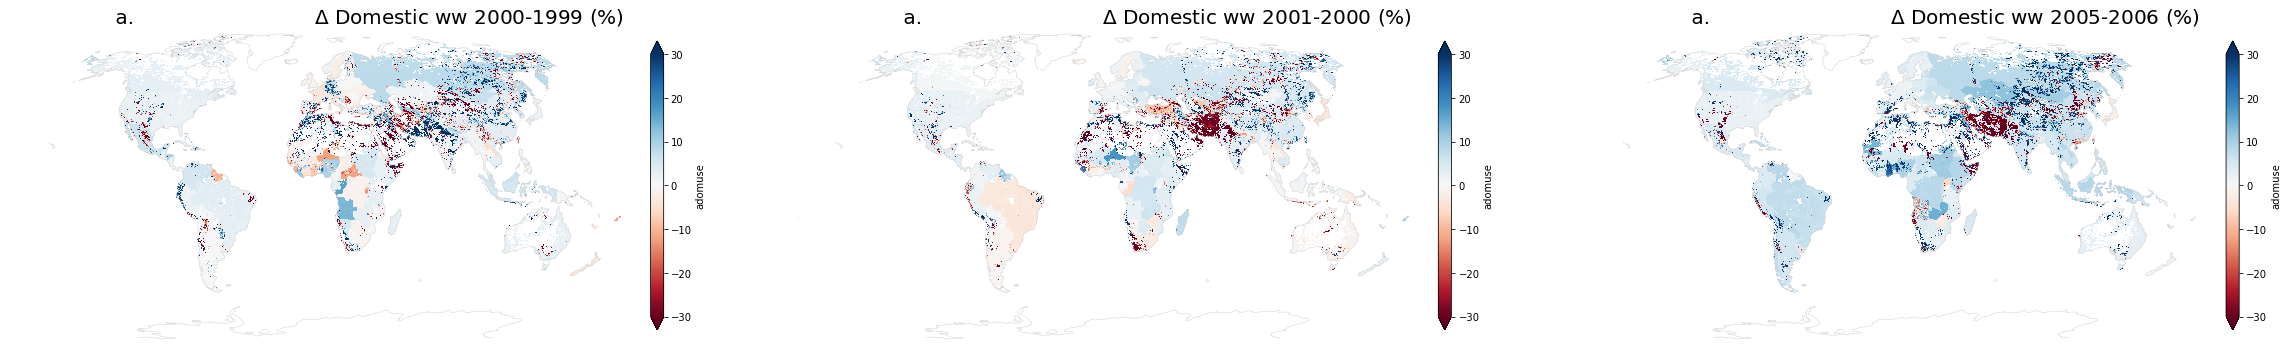

In [238]:
variable_name = 'Domestic ww'
ww = domww

ww_2000 = ww.sel(time="2000-12-31").squeeze()
ww_1999 = ww.sel(time="1999-12-31").squeeze()
ww_2001 = ww.sel(time="2001-12-31").squeeze()
ww_2005 = ww.sel(time="2005-12-31").squeeze()
ww_2006 = ww.sel(time="2006-12-31").squeeze()

delta_2000_1999 = (ww_2000 - ww_1999)/ww_1999 *100
delta_2001_2000 = (ww_2001 - ww_2000)/ww_2000 *100
delta_2006_2005 = (ww_2006 - ww_2005)/ww_2005 *100

plot_2000_transition_maps(delta_2000_1999,delta_2001_2000,delta_2006_2005, variable_name)


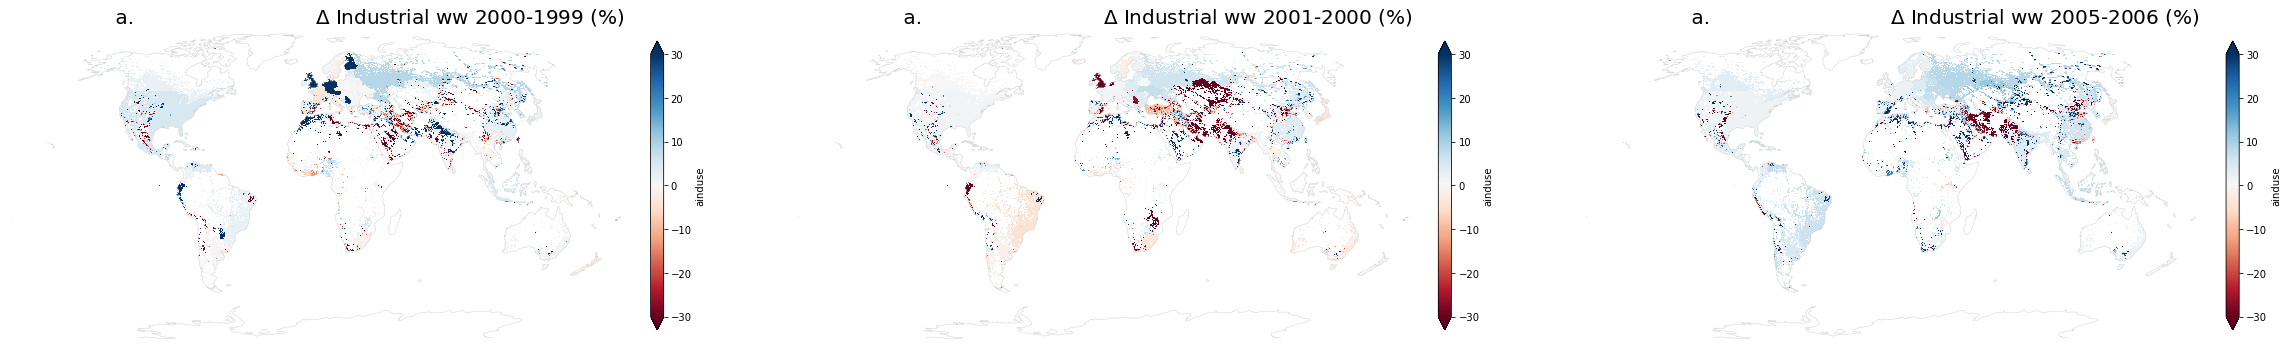

In [239]:
variable_name = 'Industrial ww'
ww = indww


ww_2000 = ww.sel(time="2000-12-31").squeeze()
ww_1999 = ww.sel(time="1999-12-31").squeeze()
ww_2001 = ww.sel(time="2001-12-31").squeeze()
ww_2005 = ww.sel(time="2005-12-31").squeeze()
ww_2006 = ww.sel(time="2006-12-31").squeeze()

delta_2000_1999 = (ww_2000 - ww_1999)/ww_1999 *100
delta_2001_2000 = (ww_2001 - ww_2000)/ww_2000 *100
delta_2006_2005 = (ww_2006 - ww_2005)/ww_2005 *100

plot_2000_transition_maps(delta_2000_1999,delta_2001_2000,delta_2006_2005, variable_name)


### Plot timeseries for individual grid cells and global mean

DOMESTIC


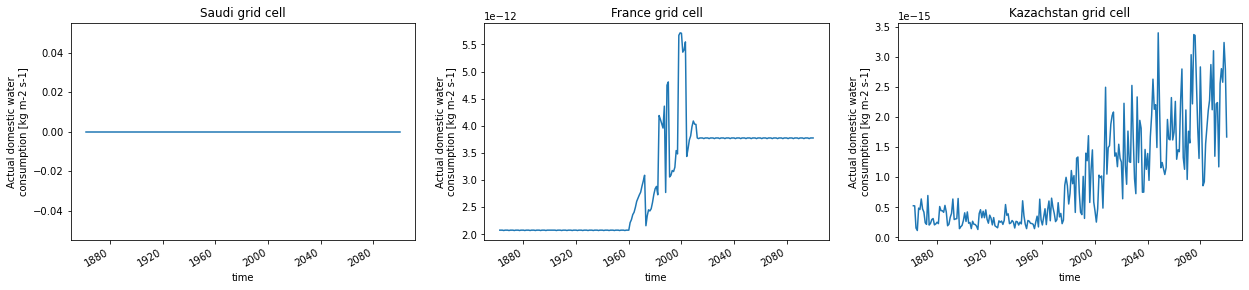

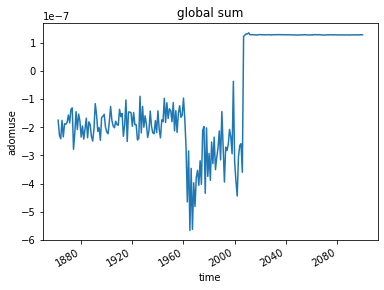

In [240]:
# define variable to plot 
da = domww

print('DOMESTIC')

# do plotting
plot_cell_series(da, cells_toplot, names_toplot)

plot_globalsum_timeseries(da)

INDUSTRIAL


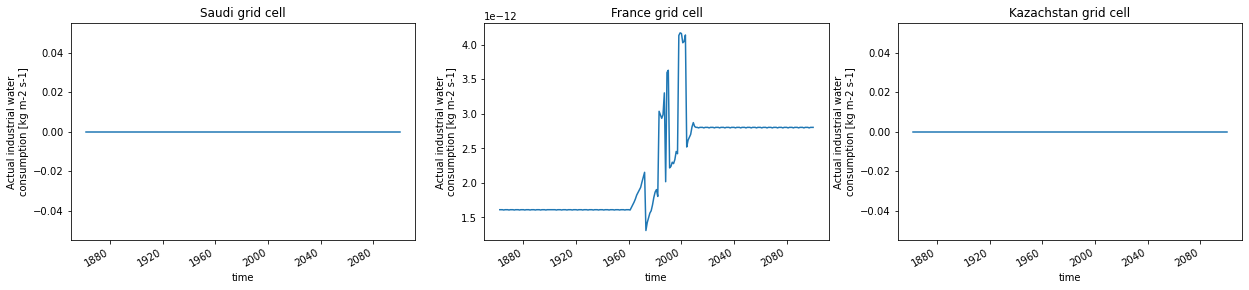

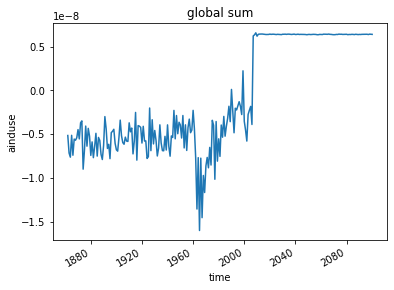

In [241]:
# define variable to plot 
da = indww

print('INDUSTRIAL')

# do plotting
plot_cell_series(da, cells_toplot, names_toplot)

plot_globalsum_timeseries(da)